In [15]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math
from scipy.integrate import odeint
import pandas as pd
import seaborn
from scipy import stats
import seaborn as sns
from scipy.stats import hypergeom

In [16]:
def enrichment_test(x_total, y_total, x_i, y_i):
    """
    Parameters:
    - x_total: Total associated genes in the entire gene pool (x)
    - y_total: Total annotated genes in the entire gene pool (y)
    - x_i: Observed associated genes in family i
    - y_i: Total annotated genes in family i
    Returns:
    - p-value for enrichment
    """
    # Hypergeometric test parameters:
    # N = total genes (y), K = total associated genes (x), n = genes in pathway (y_i)
    p_val = hypergeom.sf(x_i - 1, y_total, x_total, y_i)
    return p_val

In [17]:
df_ProteinFamily=pd.read_excel('ProteinFamilyMapping.xlsx',sheet_name=1)

In [18]:
print(np.size(df_ProteinFamily,0))

48


In [19]:
n0=6986
n1=708
n2=724
PP1=np.zeros(np.size(df_ProteinFamily,0))
for i in range(np.size(df_ProteinFamily,0)):
    x_total = n1  # Total associated genes in the entire pool
    y_total = n0  # Total genes in the entire pool
    x_i = df_ProteinFamily.iloc[i, 1]  # Observed associated genes in family i
    y_i = df_ProteinFamily.iloc[i, 0]   #Total annotated genes in family i
    p_value = enrichment_test(x_total, y_total, x_i, y_i)
    PP1[i]=p_value

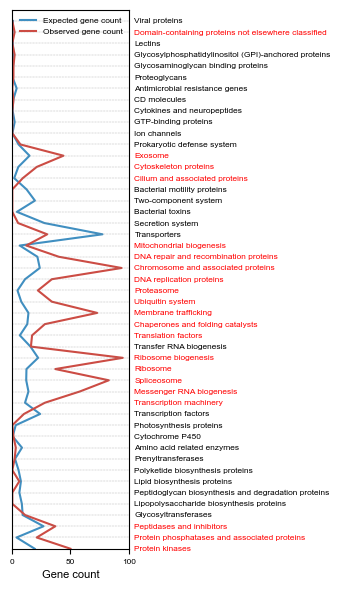

In [20]:
plt.figure(figsize=[1.5,7])
plt.plot(df_ProteinFamily.iloc[:, 0] * n1 / n0,np.arange(0,np.size(df_ProteinFamily,0)),'-',label='Expected gene count',color='#408FC1')
plt.plot(df_ProteinFamily.iloc[:, 1],np.arange(0,np.size(df_ProteinFamily,0)),'-',label='Observed gene count',color='#CC4C44')
plt.hlines(y=range(1, np.size(df_ProteinFamily,0)), xmin=0, xmax=100, colors='gray', linestyles='-.',linewidth=.2)
plt.xlim(0,100)
plt.ylim(0,np.size(df_ProteinFamily,0))
tick_labels = df_ProteinFamily.iloc[:, 3]
# Move y - axis tick labels to the right
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
# Set the y-axis tick positions
plt.legend(frameon=False, prop={'family': 'Arial', 'size': 6})
# New code to color tick labels based on PP array
yticks = np.arange(0, np.size(df_ProteinFamily, 0))
for i, tick in enumerate(yticks):
    if PP1[i] < 0.05:
        ax.text(1.05, tick, tick_labels[i], ha='left', va='center', color='red', fontsize=6, fontname='Arial', transform=ax.get_yaxis_transform())
    else:
        ax.text(1.05, tick, tick_labels[i], ha='left', va='center', color='black', fontsize=6, fontname='Arial', transform=ax.get_yaxis_transform())
plt.yticks([])
#plt.yticks(np.arange(0, np.size(df_ProteinFamily, 0)), tick_labels,fontsize=6, fontname='Arial')
plt.xticks(fontsize=6, fontname='Arial')
plt.xlabel('Gene count',fontsize=8, fontname='Arial')
plt.savefig("EnrichmentAnalysis_K03006.pdf", format='pdf', bbox_inches='tight')

In [21]:
n0=6986
n1=708
n2=724
PP2=np.zeros(np.size(df_ProteinFamily,0))
for i in range(np.size(df_ProteinFamily,0)):
    x_total = n2  # Total associated genes in the entire pool
    y_total = n0  # Total genes in the entire pool
    x_i = df_ProteinFamily.iloc[i, 2]  # Observed associated genes in family i
    y_i = df_ProteinFamily.iloc[i, 0]   #Total annotated genes in family i
    p_value = enrichment_test(x_total, y_total, x_i, y_i)
    PP2[i]=p_value

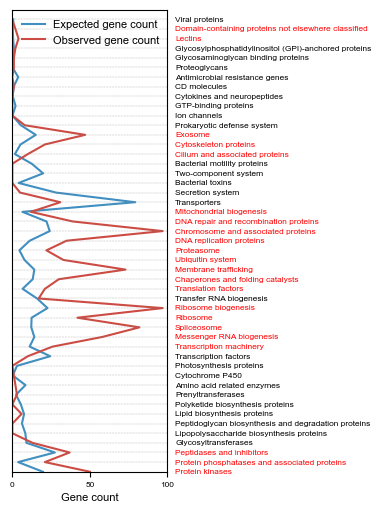

In [22]:
n0=6986
n1=708
n2=724
plt.figure(figsize=[2,6])
plt.plot(df_ProteinFamily.iloc[:, 0] * n2 / n0,np.arange(0,np.size(df_ProteinFamily,0)),'-',label='Expected gene count',color='#408FC1')
plt.plot(df_ProteinFamily.iloc[:, 2],np.arange(0,np.size(df_ProteinFamily,0)),'-',label='Observed gene count',color='#CC4C44')
plt.hlines(y=range(1, np.size(df_ProteinFamily,0)), xmin=0, xmax=100, colors='gray', linestyles='-.',linewidth=.2)
plt.xlim(0,100)
plt.ylim(0,np.size(df_ProteinFamily,0))
tick_labels = df_ProteinFamily.iloc[:, 3]
# Move y - axis tick labels to the right
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
# Set the y-axis tick positions
plt.legend(frameon=False, prop={'family': 'Arial', 'size': 8})
# New code to color tick labels based on PP array
yticks = np.arange(0, np.size(df_ProteinFamily, 0))
for i, tick in enumerate(yticks):
    if PP2[i] < 0.05:
        ax.text(1.05, tick, tick_labels[i], ha='left', va='center', color='red', fontsize=6, fontname='Arial', transform=ax.get_yaxis_transform())
    else:
        ax.text(1.05, tick, tick_labels[i], ha='left', va='center', color='black', fontsize=6, fontname='Arial', transform=ax.get_yaxis_transform())
plt.yticks([])
#plt.yticks(np.arange(0, np.size(df_ProteinFamily, 0)), tick_labels,fontsize=6, fontname='Arial')
plt.xticks(fontsize=6, fontname='Arial')
plt.xlabel('Gene count',fontsize=8, fontname='Arial')
plt.savefig("EnrichmentAnalysis_K03283.pdf", format='pdf', bbox_inches='tight')